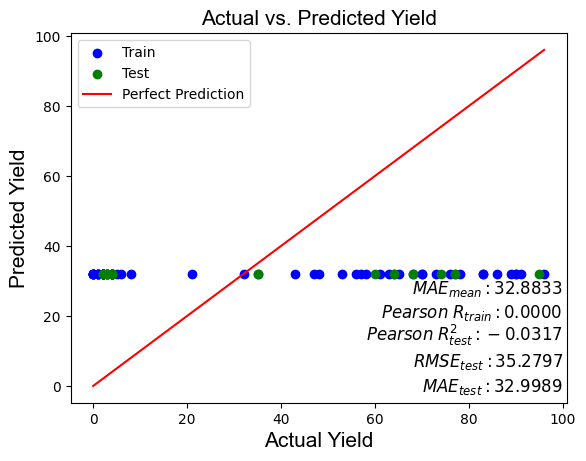

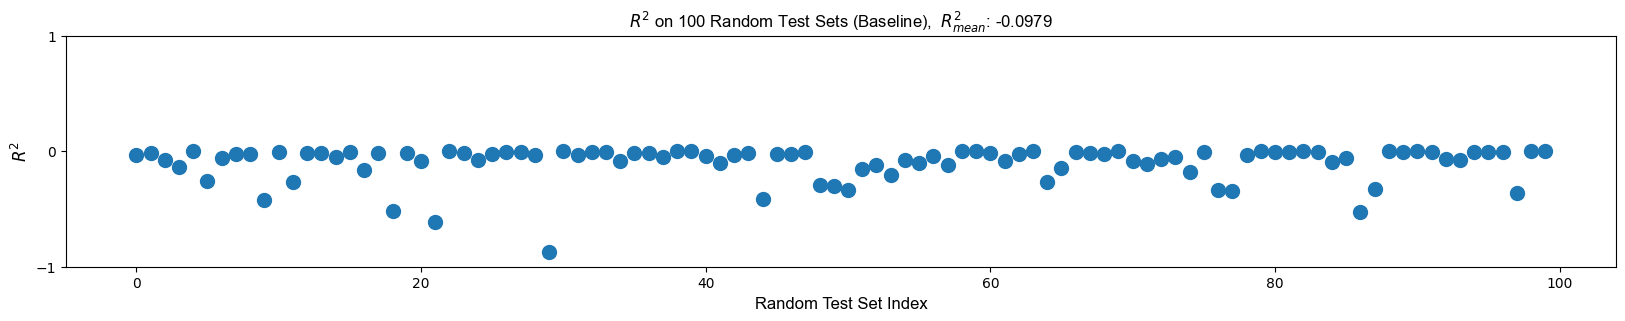

R2_LOO: -0.0272


In [4]:
# baseline模型为只预测训练集中的平均值
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
optuna.logging.set_verbosity(optuna.logging.WARNING)
from iterative_optimization import iterative_optimization
from leave_one_out_validation import leave_one_out_validation

class Baseline:
    def fit(self, X, y):
        self.mean = y.mean()
    def predict(self, X):
        return np.full(X.shape[0], self.mean)

baseline = Baseline()

data = pd.read_csv('data.csv')
features = data.select_dtypes(include=[np.number]).columns
X = data[features].drop('yield', axis=1)
y = data['yield']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
baseline.fit(scaler.fit_transform(X_train), y_train)
y_pred_train = baseline.predict(scaler.transform(X_train))
y_pred_test = baseline.predict(scaler.transform(X_test))

mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_LOO = leave_one_out_validation(baseline, scaler, X, y)

r2_test_list = []
mae_test_list = []
model1 = baseline
for i in range(100):
    random_state = i
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model1.fit(scaler.fit_transform(X_train_1), y_train_1)
    y_pred_test_1 = model1.predict(scaler.transform(X_test_1))
    r2_test_1 = r2_score(y_test_1, y_pred_test_1)
    mae_test_1 = mean_absolute_error(y_test_1, y_pred_test_1)
    mae_test_list.append(mae_test_1)
    r2_test_list.append(r2_test_1)


plt.scatter(y_train, y_pred_train, color='blue', label='Train')
plt.scatter(y_test, y_pred_test, color='green', label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Perfect Prediction')
plt.xlabel('Actual Yield', fontsize=15, fontname='Arial')
plt.ylabel('Predicted Yield', fontsize=15, fontname='Arial')
plt.title(f'Actual vs. Predicted Yield', fontsize=15, fontname='Arial')
plt.legend()
plt.grid(False)

plt.text(100, -3, fr"$MAE_{{test}}: {mae_test:.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.text(100, 4, fr"$RMSE_{{test}}: {rmse_test:.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.text(100, 11, fr"$Pearson \; R^{2}_{{test}}: {(r2_test):.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.text(100, 18, fr"$Pearson \; R_{{train}}: {np.sqrt(r2_train):.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.text(100, 25, fr'$MAE_{{mean}}: {np.mean(mae_test_list):.4f}$', fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.show()


plt.figure(figsize=(20, 3))
plt.scatter(range(100), r2_test_list, s=100)
plt.ylim(-1, 1)
plt.yticks([-1, 0, 1])
plt.xlabel('Random Test Set Index', fontsize=12, fontname='Arial')
plt.ylabel(fr'$R^2$', fontsize=12, fontname='Arial')
plt.title(fr'$R^2$ on 100 Random Test Sets (Baseline),  $R^2_{{mean}}$: {np.mean(r2_test_list):.4f}', fontsize=12, fontname='Arial')
plt.show()

print(f'R2_LOO: {r2_LOO:.4f}')

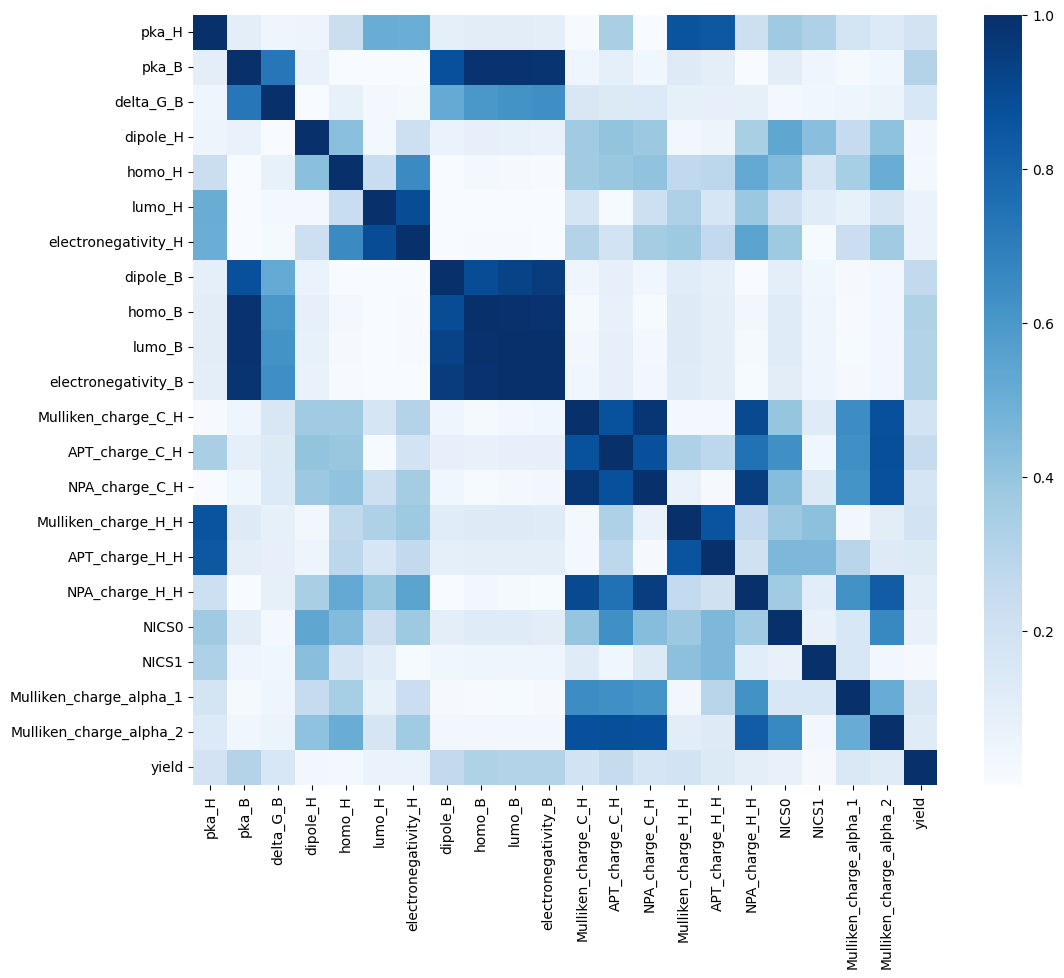

In [ ]:
data = pd.read_csv('data.csv')

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr().abs(), annot=False, cmap='Blues')
plt.show()

random_state = 42
Best hyperparameters: {}
Train R^2: 0.3464
Test R^2: -0.3321
Test RMSE: 40.0882
Test MAE: 34.9006
Average MAE on 100 times random test sets: 34.9797
Current feature combination:
Index(['pka_H', 'pka_B', 'delta_G_B', 'dipole_H', 'homo_H', 'lumo_H',
       'electronegativity_H', 'dipole_B', 'homo_B', 'lumo_B',
       'electronegativity_B', 'Mulliken_charge_C_H', 'APT_charge_C_H',
       'NPA_charge_C_H', 'Mulliken_charge_H_H', 'APT_charge_H_H',
       'NPA_charge_H_H', 'NICS0', 'NICS1', 'Mulliken_charge_alpha_1',
       'Mulliken_charge_alpha_2'],
      dtype='object')
Removing feature: pka_B
Feature importance: 8.63%
Correlation with other features:
  pka_B - dipole_B: 0.88
  pka_B - homo_B: 0.98
  pka_B - lumo_B: 0.99
  pka_B - electronegativity_B: 0.98
Removing feature: Mulliken_charge_H_H
Feature importance: 0.31%
Correlation with other features:
  Mulliken_charge_H_H - pka_H: 0.86
  Mulliken_charge_H_H - APT_charge_H_H: 0.86
Removing feature: APT_charge_H_H
Feature

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+04, tolerance: 6.884e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.871e+00, tolerance: 6.884e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+04, tolerance: 6.817e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.697e+00, tolerance: 6.739e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+04, tolerance: 6.884e+00
Objective did n

random_state = 42
Best hyperparameters: {'alpha': 2.051356300142457}
Train R^2: 0.1885
Test R^2: 0.1453
Test RMSE: 32.1122
Test MAE: 28.5836
Average MAE on 100 times random test sets: 30.4985
Current feature combination:
Index(['pka_H', 'pka_B', 'delta_G_B', 'dipole_H', 'homo_H', 'lumo_H',
       'electronegativity_H', 'dipole_B', 'homo_B', 'lumo_B',
       'electronegativity_B', 'Mulliken_charge_C_H', 'APT_charge_C_H',
       'NPA_charge_C_H', 'Mulliken_charge_H_H', 'APT_charge_H_H',
       'NPA_charge_H_H', 'NICS0', 'NICS1', 'Mulliken_charge_alpha_1',
       'Mulliken_charge_alpha_2'],
      dtype='object')
Removing feature: dipole_B
Feature importance: 0.00%
Correlation with other features:
  dipole_B - pka_B: 0.88
  dipole_B - homo_B: 0.89
  dipole_B - lumo_B: 0.93
  dipole_B - electronegativity_B: 0.95
Removing feature: pka_H
Feature importance: 3.83%
Correlation with other features:
  pka_H - Mulliken_charge_H_H: 0.86
  pka_H - APT_charge_H_H: 0.85
Removing feature: APT_charge_H_

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+01, tolerance: 6.884e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+03, tolerance: 6.884e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+03, tolerance: 6.817e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.006e+01, tolerance: 6.739e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.087e+03, tolerance: 6.739e+00
Objective did n

random_state = 42
Best hyperparameters: {'alpha': 2.0488344102317293}
Train R^2: 0.1883
Test R^2: 0.1469
Test RMSE: 32.0803
Test MAE: 28.5695
Average MAE on 100 times random test sets: 30.3608
Current feature combination:
Index(['pka_B', 'delta_G_B', 'dipole_H', 'homo_H', 'lumo_H',
       'electronegativity_H', 'homo_B', 'lumo_B', 'electronegativity_B',
       'Mulliken_charge_C_H', 'APT_charge_C_H', 'NPA_charge_C_H',
       'Mulliken_charge_H_H', 'NPA_charge_H_H', 'NICS0', 'NICS1',
       'Mulliken_charge_alpha_1', 'Mulliken_charge_alpha_2'],
      dtype='object')
Removing feature: pka_B
Feature importance: 0.54%
Correlation with other features:
  pka_B - homo_B: 0.98
  pka_B - lumo_B: 0.99
  pka_B - electronegativity_B: 0.98
Removing feature: lumo_B
Feature importance: 0.00%
Correlation with other features:
  lumo_B - pka_B: 0.99
  lumo_B - homo_B: 1.00
  lumo_B - electronegativity_B: 1.00
Removing feature: electronegativity_B
Feature importance: 0.00%
Correlation with other features

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.488e+01, tolerance: 6.977e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.640e+01, tolerance: 6.977e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.251e+01, tolerance: 6.977e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.020e+01, tolerance: 6.977e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.234e+01, tolerance: 6.977e+00
Objective did n

random_state = 42
Best hyperparameters: {'alpha': 2.020459447587695}
Train R^2: 0.1888
Test R^2: 0.1475
Test RMSE: 32.0697
Test MAE: 28.5564
Average MAE on 100 times random test sets: 30.2706
Current feature combination:
Index(['delta_G_B', 'dipole_H', 'homo_H', 'lumo_H', 'electronegativity_H',
       'homo_B', 'Mulliken_charge_C_H', 'APT_charge_C_H', 'NPA_charge_C_H',
       'Mulliken_charge_H_H', 'NPA_charge_H_H', 'NICS0', 'NICS1',
       'Mulliken_charge_alpha_1', 'Mulliken_charge_alpha_2'],
      dtype='object')
Removing feature: Mulliken_charge_C_H
Feature importance: 0.00%
Correlation with other features:
  Mulliken_charge_C_H - APT_charge_C_H: 0.87
  Mulliken_charge_C_H - NPA_charge_C_H: 0.98
  Mulliken_charge_C_H - NPA_charge_H_H: 0.90
  Mulliken_charge_C_H - Mulliken_charge_alpha_2: 0.88
Removing feature: NPA_charge_C_H
Feature importance: 0.00%
Correlation with other features:
  NPA_charge_C_H - Mulliken_charge_C_H: 0.98
  NPA_charge_C_H - APT_charge_C_H: 0.88
  NPA_charge_C_

  0%|          | 0/60 [00:00<?, ?it/s]

Removing feature: dipole_B
Feature importance: 3.73%
Correlation with other features:
  dipole_B - pka_B: 0.88
  dipole_B - homo_B: 0.89
  dipole_B - lumo_B: 0.93
  dipole_B - electronegativity_B: 0.95
Removing feature: pka_H
Feature importance: 3.60%
Correlation with other features:
  pka_H - Mulliken_charge_H_H: 0.86
  pka_H - APT_charge_H_H: 0.85
Removing feature: APT_charge_H_H
Feature importance: 3.17%
Correlation with other features:
  APT_charge_H_H - pka_H: 0.85
  APT_charge_H_H - Mulliken_charge_H_H: 0.86
random_state = 42
Best hyperparameters: {'C': 123.27331192910003, 'epsilon': 4.739388545123879, 'kernel': 'rbf'}
Train R^2: 0.9237
Test R^2: 0.6820
Test RMSE: 19.5871
Test MAE: 15.5670
Average MAE on 100 times random test sets: 19.6936
Current feature combination:
Index(['pka_B', 'delta_G_B', 'dipole_H', 'homo_H', 'lumo_H',
       'electronegativity_H', 'homo_B', 'lumo_B', 'electronegativity_B',
       'Mulliken_charge_C_H', 'APT_charge_C_H', 'NPA_charge_C_H',
       'Mullike

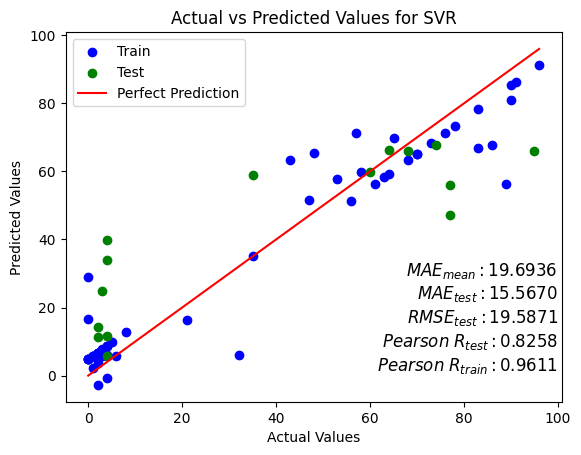

  0%|          | 0/60 [00:00<?, ?it/s]

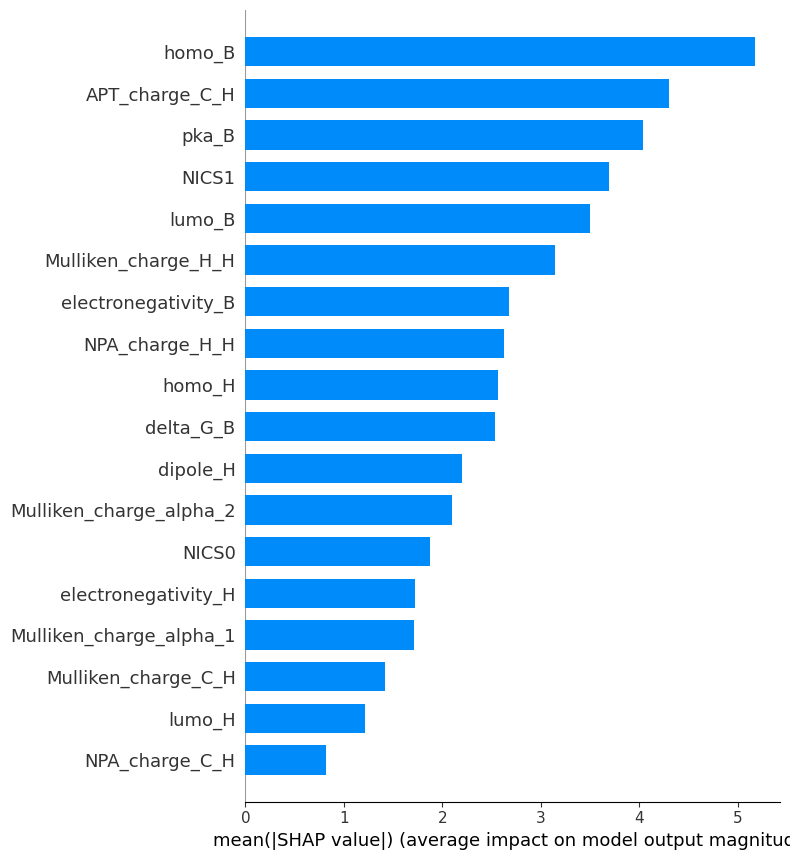

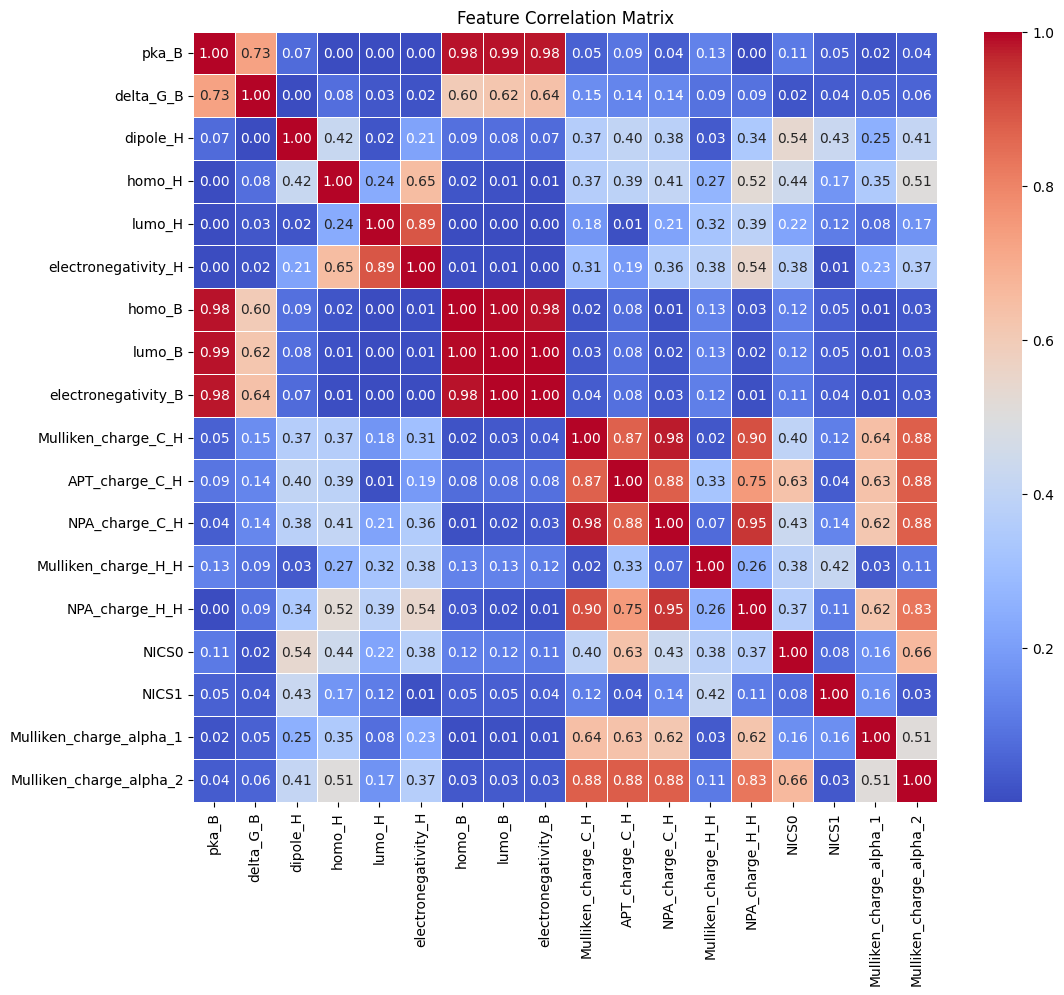

Removing feature: pka_B
Feature importance: 8.53%
Correlation with other features:
  pka_B - homo_B: 0.98
  pka_B - lumo_B: 0.99
  pka_B - electronegativity_B: 0.98
Removing feature: lumo_B
Feature importance: 7.40%
Correlation with other features:
  lumo_B - pka_B: 0.99
  lumo_B - homo_B: 1.00
  lumo_B - electronegativity_B: 1.00
Removing feature: electronegativity_B
Feature importance: 5.66%
Correlation with other features:
  electronegativity_B - pka_B: 0.98
  electronegativity_B - homo_B: 0.98
  electronegativity_B - lumo_B: 1.00
random_state = 42
Best hyperparameters: {'C': 140.26079138689377, 'epsilon': 5.966241608092413, 'kernel': 'rbf'}
Train R^2: 0.9270
Test R^2: 0.6885
Test RMSE: 19.3841
Test MAE: 15.9796
Average MAE on 100 times random test sets: 21.4738
Current feature combination:
Index(['delta_G_B', 'dipole_H', 'homo_H', 'lumo_H', 'electronegativity_H',
       'homo_B', 'Mulliken_charge_C_H', 'APT_charge_C_H', 'NPA_charge_C_H',
       'Mulliken_charge_H_H', 'NPA_charge_H_

  0%|          | 0/60 [00:00<?, ?it/s]

Removing feature: lumo_H
Feature importance: 2.82%
Correlation with other features:
  lumo_H - electronegativity_H: 0.89
Removing feature: NPA_charge_C_H
Feature importance: 1.81%
Correlation with other features:
  NPA_charge_C_H - Mulliken_charge_C_H: 0.98
  NPA_charge_C_H - APT_charge_C_H: 0.88
  NPA_charge_C_H - NPA_charge_H_H: 0.95
  NPA_charge_C_H - Mulliken_charge_alpha_2: 0.88
Removing feature: Mulliken_charge_C_H
Feature importance: 2.91%
Correlation with other features:
  Mulliken_charge_C_H - APT_charge_C_H: 0.87
  Mulliken_charge_C_H - NPA_charge_C_H: 0.98
  Mulliken_charge_C_H - NPA_charge_H_H: 0.90
  Mulliken_charge_C_H - Mulliken_charge_alpha_2: 0.88
random_state = 42
Best hyperparameters: {'C': 162.2270821488902, 'epsilon': 5.825731212704032, 'kernel': 'rbf'}
Train R^2: 0.9421
Test R^2: 0.6471
Test RMSE: 20.6340
Test MAE: 15.9122
Average MAE on 100 times random test sets: 20.1958
Current feature combination:
Index(['delta_G_B', 'dipole_H', 'homo_H', 'electronegativity_H'

  0%|          | 0/60 [00:00<?, ?it/s]

Removing feature: Mulliken_charge_alpha_2
Feature importance: 3.63%
Correlation with other features:
  Mulliken_charge_alpha_2 - APT_charge_C_H: 0.88
  Mulliken_charge_alpha_2 - NPA_charge_H_H: 0.83
random_state = 42
Best hyperparameters: {'C': 191.88067365548505, 'epsilon': 2.9931486108624874, 'kernel': 'rbf'}
Train R^2: 0.9632
Test R^2: 0.6416
Test RMSE: 20.7945
Test MAE: 16.0348
Average MAE on 100 times random test sets: 19.2472
Current feature combination:
Index(['delta_G_B', 'dipole_H', 'homo_H', 'electronegativity_H', 'homo_B',
       'APT_charge_C_H', 'Mulliken_charge_H_H', 'NPA_charge_H_H', 'NICS0',
       'NICS1', 'Mulliken_charge_alpha_1'],
      dtype='object')


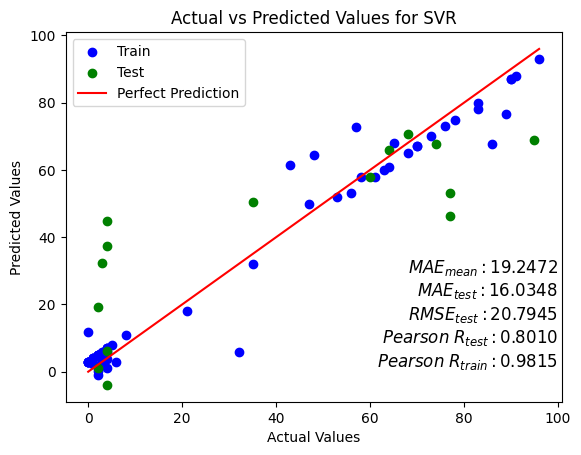

  0%|          | 0/60 [00:00<?, ?it/s]

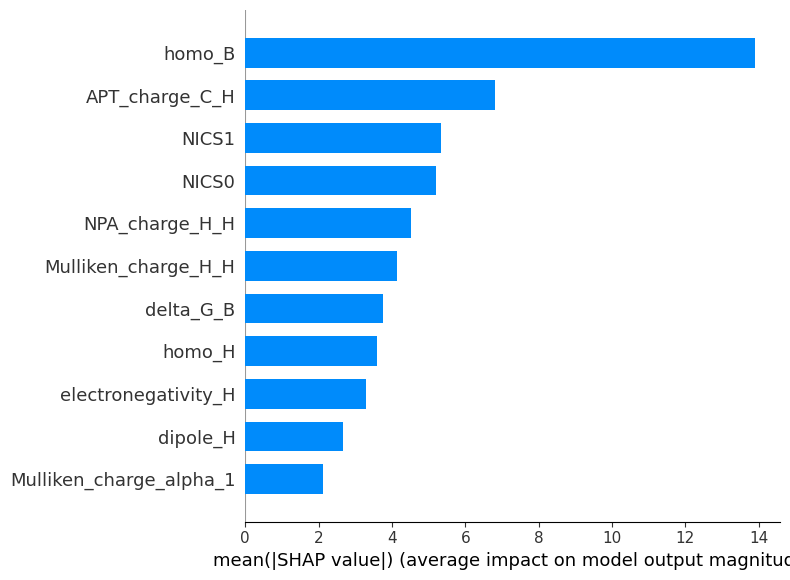

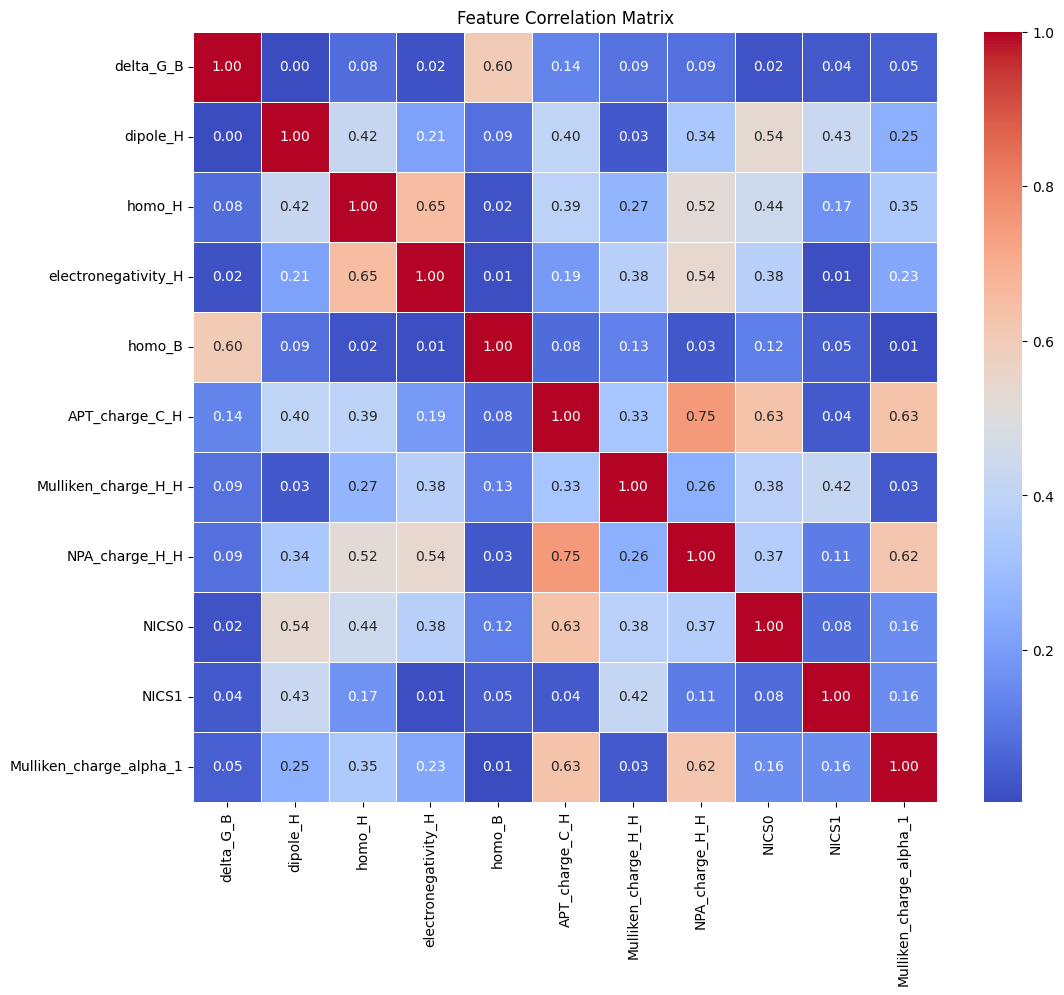

Removing feature: dipole_H
Feature importance: 4.81%
Correlation with other features:
Removing feature: Mulliken_charge_alpha_1
Feature importance: 3.83%
Correlation with other features:
random_state = 42
Best hyperparameters: {'C': 78.29113011996462, 'epsilon': 0.265571899341657, 'kernel': 'poly'}
Train R^2: 0.8204
Test R^2: 0.3451
Test RMSE: 28.1083
Test MAE: 23.7364
Average MAE on 100 times random test sets: 23.2692
Current feature combination:
Index(['delta_G_B', 'homo_H', 'electronegativity_H', 'homo_B',
       'APT_charge_C_H', 'Mulliken_charge_H_H', 'NPA_charge_H_H', 'NICS0',
       'NICS1'],
      dtype='object')


  0%|          | 0/60 [00:00<?, ?it/s]

random_state = 42
Best hyperparameters: {'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 5}
Train R^2: 0.6394
Test R^2: 0.4695
Test RMSE: 25.2993
Test MAE: 15.1344
Average MAE on 100 times random test sets: 22.3921
Current feature combination:
Index(['pka_H', 'pka_B', 'delta_G_B', 'dipole_H', 'homo_H', 'lumo_H',
       'electronegativity_H', 'dipole_B', 'homo_B', 'lumo_B',
       'electronegativity_B', 'Mulliken_charge_C_H', 'APT_charge_C_H',
       'NPA_charge_C_H', 'Mulliken_charge_H_H', 'APT_charge_H_H',
       'NPA_charge_H_H', 'NICS0', 'NICS1', 'Mulliken_charge_alpha_1',
       'Mulliken_charge_alpha_2'],
      dtype='object')
Removing feature: dipole_B
Feature importance: 0.00%
Correlation with other features:
  dipole_B - pka_B: 0.88
  dipole_B - homo_B: 0.89
  dipole_B - lumo_B: 0.93
  dipole_B - electronegativity_B: 0.95
Removing feature: Mulliken_charge_H_H
Feature importance: 0.00%
Correlation with other features:
  Mulliken_charge_H_H - pka_H: 0.86
  Mulliken_ch

In [2]:
from iterative_optimization import iterative_optimization
# 定义待选模型
models = {
    'LinearRegression': LinearRegression,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'SVR': SVR,
    'DecisionTree': DecisionTreeRegressor,
    'RandomForest': RandomForestRegressor,
    'GradientBoosting': GradientBoostingRegressor,
    'XGBoost': XGBRegressor
}


features = data.select_dtypes(include=[np.number]).columns # 选择数值列
X = data[features].drop('yield', axis=1)  # 假设目标列名为 'yield'
y = data['yield']

# 运行迭代优化
results, char_change = iterative_optimization(models, X, y,n_trials=100)




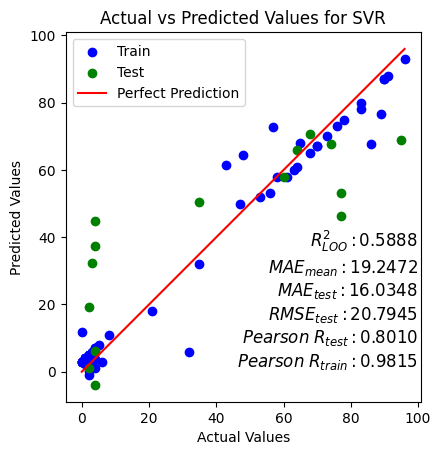

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
optuna.logging.set_verbosity(optuna.logging.WARNING)
from iterative_optimization import iterative_optimization
from leave_one_out_validation import leave_one_out_validation
data = pd.read_csv('data.csv')
data1 = data[['delta_G_B', 'dipole_H', 'homo_H', 'electronegativity_H', 'homo_B',
       'APT_charge_C_H', 'Mulliken_charge_H_H', 'NPA_charge_H_H', 'NICS0',
       'NICS1', 'Mulliken_charge_alpha_1','yield']]
model = SVR(C= 191.88067365548505, epsilon= 2.9931486108624874, kernel= 'rbf')
features = data1.select_dtypes(include=[np.number]).columns # 选择数值列
X = data1[features].drop('yield', axis=1)  # 假设目标列名为 'yield'
y = data1['yield']
scaler = StandardScaler()


mae_test_list = []
for i in range(100):
       random_state = i
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
       model.fit(scaler.fit_transform(X_train), y_train)
       y_pred_test = model.predict(scaler.transform(X_test))
       mae_test = mean_absolute_error(y_test, y_pred_test)
       mae_test_list.append(mae_test)
mae_mean = np.mean(mae_test_list)


data1 = data[['delta_G_B', 'dipole_H', 'homo_H', 'electronegativity_H', 'homo_B','APT_charge_C_H', 'Mulliken_charge_H_H', 'NPA_charge_H_H', 'NICS0','NICS1', 'Mulliken_charge_alpha_1','yield']]
model1 = SVR(C= 191.88067365548505, epsilon= 2.9931486108624874, kernel= 'rbf')
features = data1.select_dtypes(include=[np.number]).columns # 选择数值列
X = data1[features].drop('yield', axis=1)  # 假设目标列名为 'yield'
y = data1['yield']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1.fit(scaler.fit_transform(X_train), y_train)
# r2_LOO = leave_one_out_validation(model1,scaler,X,y)
# print(r2_LOO)
y_pred_train = model1.predict(scaler.transform(X_train))
y_pred_test = model1.predict(scaler.transform(X_test))

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
# print(mae_test)

plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_train, y_pred_train, color='blue', label='Train')
plt.scatter(y_test, y_pred_test, color='green', label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values for SVR')
plt.legend()

# Display performance metrics on the plot

plt.text(100, 0, fr"$Pearson \; R_{{train}}: {np.sqrt(r2_train):.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.text(100, 14, fr"$RMSE_{{test}}: {rmse_test:.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.text(100, 7, fr"$Pearson \; R_{{test}}: {np.sqrt(r2_test):.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')        
plt.text(100, 21, fr"$MAE_{{test}}: {mae_test:.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
plt.text(100,28,fr'$MAE_{{mean}}: {mae_mean:.4f}$',fontsize=12,ha='right',va='bottom',fontname='Arial')
plt.text(100,35,fr'$R^2_{{LOO}}: {r2_LOO:.4f}$',fontsize=12,ha='right',va='bottom',fontname='Arial')
plt.show()


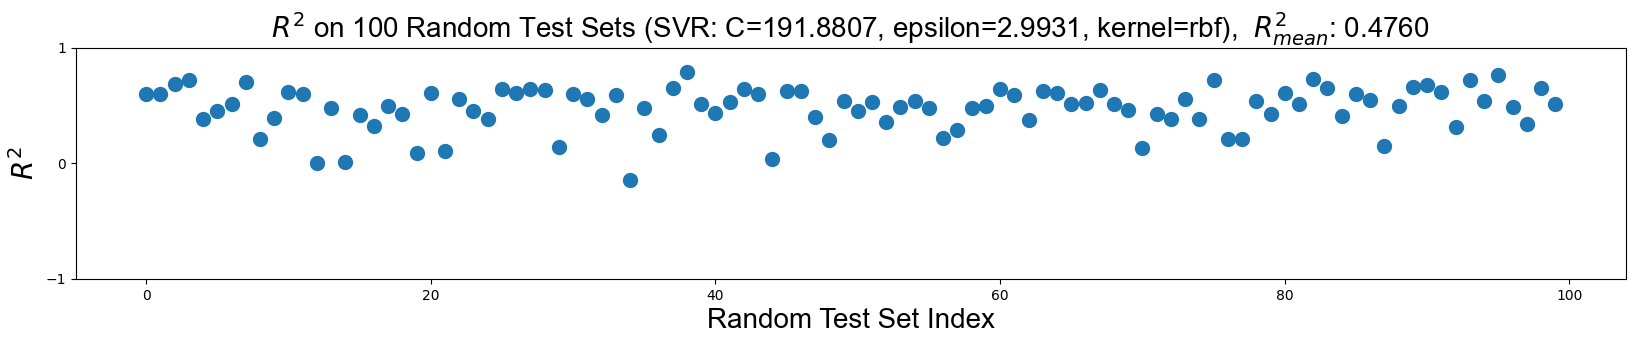

In [ ]:
# plot r2 on 100 random samples for SVR(before feature filter)
data1 = data[['delta_G_B', 'dipole_H', 'homo_H', 'electronegativity_H', 'homo_B',
       'APT_charge_C_H', 'Mulliken_charge_H_H', 'NPA_charge_H_H', 'NICS0',
       'NICS1', 'Mulliken_charge_alpha_1','yield']]
model1 = SVR(C= 191.88067365548505, epsilon= 2.9931486108624874, kernel= 'rbf')
model2 = model1
features = data1.select_dtypes(include=[np.number]).columns # 选择数值列
X = data1[features].drop('yield', axis=1)  # 假设目标列名为 'yield'
y = data1['yield']
scaler = StandardScaler()
r2_test_list = []
mae_test_list = []
for i in range(100):
    random_state = i
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model1.fit(scaler.fit_transform(X_train_1), y_train_1)
    y_pred_test_1 = model1.predict(scaler.transform(X_test_1))
    r2_test_1 = r2_score(y_test_1, y_pred_test_1)
    mae_test_1 = mean_absolute_error(y_test_1, y_pred_test_1)
    mae_test_list.append(mae_test_1)
    r2_test_list.append(r2_test_1)
plt.figure(figsize=(20, 3))
plt.scatter(range(100), r2_test_list, s=100)
plt.ylim(-1, 1)
plt.yticks([-1, 0, 1])
plt.xlabel('Random Test Set Index', fontsize=20, fontname='Arial')
plt.ylabel(fr'$R^2$', fontsize=20, fontname='Arial')
plt.title(fr'$R^2$ on 100 Random Test Sets (SVR: C={float(model2.get_params()["C"]):.4f}, epsilon={float(model2.get_params()["epsilon"]):.4f}, kernel={(model2.get_params()["kernel"])}),  $R^2_{{mean}}$: {float(np.mean(r2_test_list)):.4f}', fontsize=20, fontname='Arial')
plt.show()

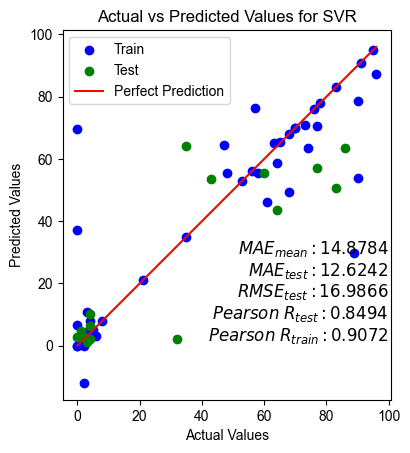

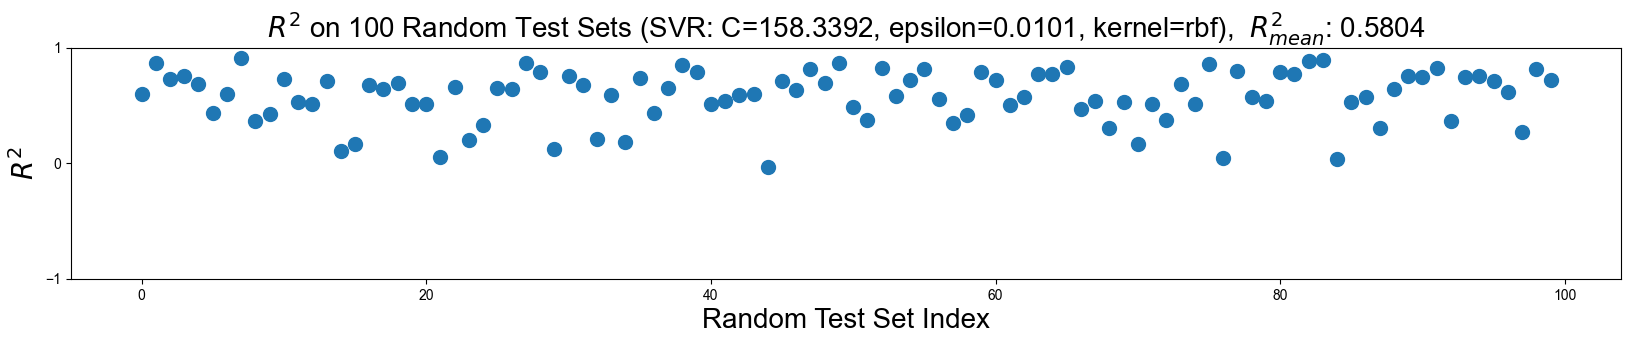

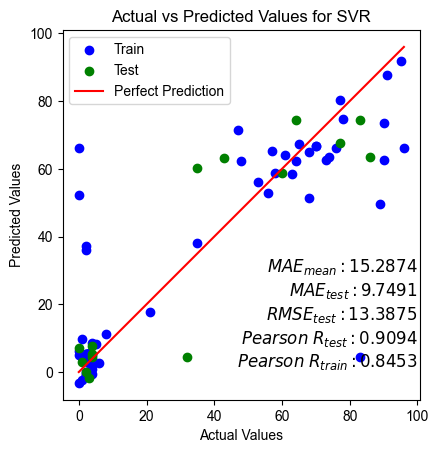

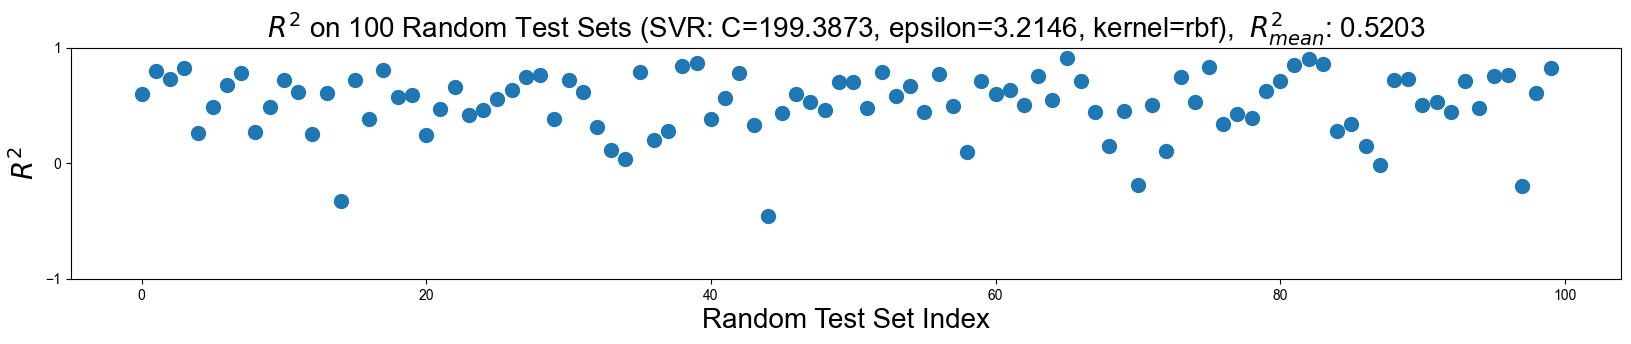

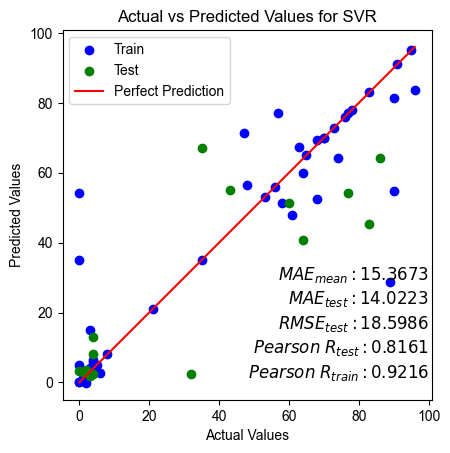

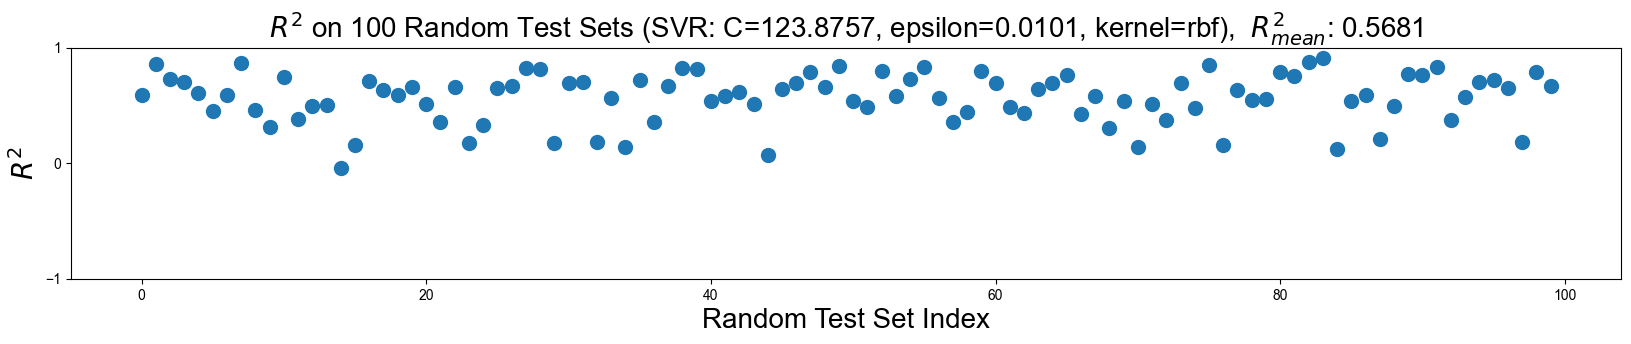

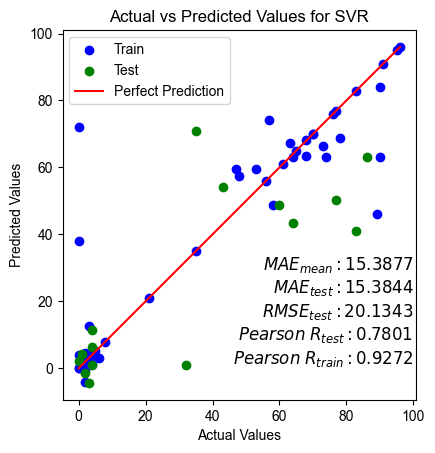

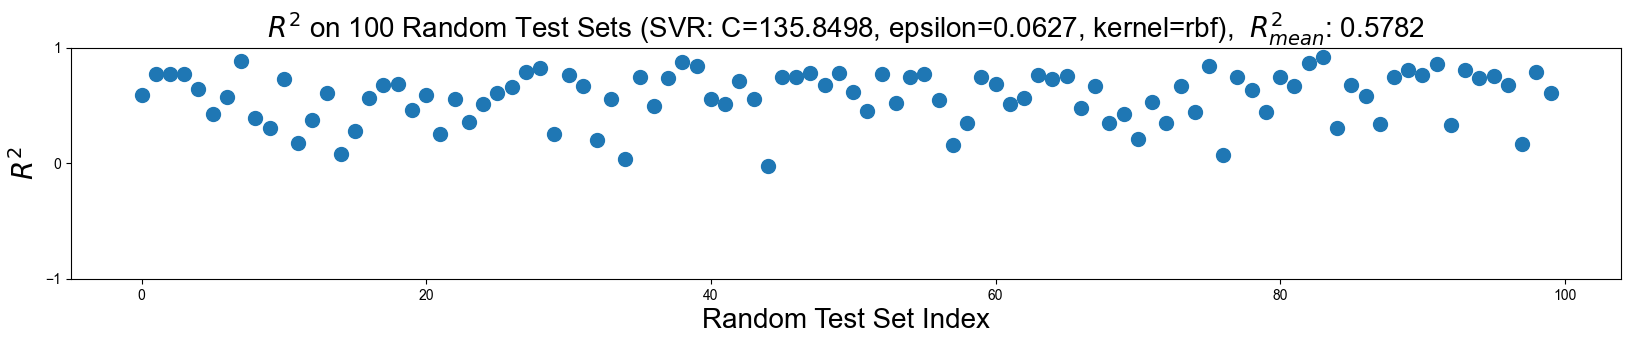

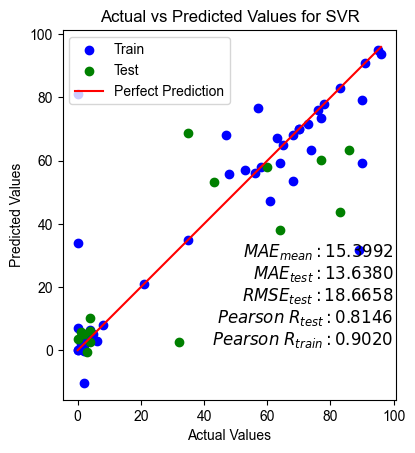

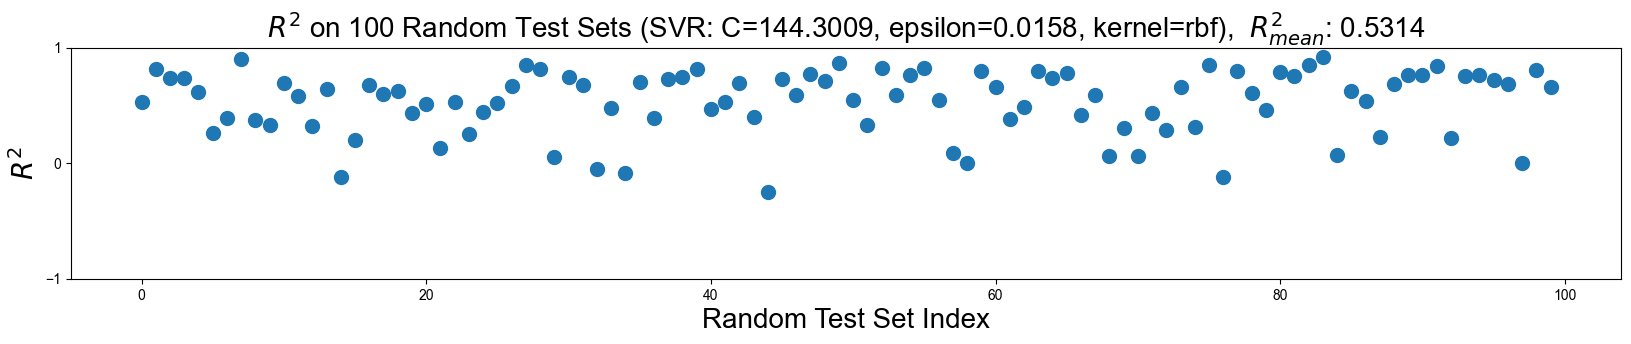

In [ ]:
# plot r2 on 100 random samples for top 5 best SVR(after feature filter)
def plot_r2_on_100_random_samples(data, model):
    features = data.select_dtypes(include=[np.number]).columns
    X = data[features].drop('yield', axis=1)
    y = data['yield']
    scaler = StandardScaler()

    mae_test_list = []
    for i in range(100):
        random_state = i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        model.fit(scaler.fit_transform(X_train), y_train)
        y_pred_test = model.predict(scaler.transform(X_test))
        mae_test = mean_absolute_error(y_test, y_pred_test)
        mae_test_list.append(mae_test)
    mae_mean = np.mean(mae_test_list)

    y_pred_train = model.predict(scaler.transform(X_train))
    y_pred_test = model.predict(scaler.transform(X_test))

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(y_train, y_pred_train, color='blue', label='Train')
    plt.scatter(y_test, y_pred_test, color='green', label='Test')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Perfect Prediction')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for SVR')
    plt.legend(loc='upper left')

    plt.text(100, 0, fr"$Pearson \; R_{{train}}: {np.sqrt(r2_train):.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
    plt.text(100, 14, fr"$RMSE_{{test}}: {rmse_test:.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
    plt.text(100, 7, fr"$Pearson \; R_{{test}}: {np.sqrt(r2_test):.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')        
    plt.text(100, 21, fr"$MAE_{{test}}: {mae_test:.4f}$", fontsize=12, ha='right', va='bottom', fontname='Arial')
    plt.text(100, 28, fr'$MAE_{{mean}}: {mae_mean:.4f}$', fontsize=12, ha='right', va='bottom', fontname='Arial')
    plt.show()

    r2_test_list = []
    mae_test_list = []
    for i in range(100):
        random_state = i
        X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=random_state)
        model.fit(scaler.fit_transform(X_train_1), y_train_1)
        y_pred_test_1 = model.predict(scaler.transform(X_test_1))
        r2_test_1 = r2_score(y_test_1, y_pred_test_1)
        mae_test_1 = mean_absolute_error(y_test_1, y_pred_test_1)
        mae_test_list.append(mae_test_1)
        r2_test_list.append(r2_test_1)
    plt.figure(figsize=(20, 3))
    plt.scatter(range(100), r2_test_list, s=100)
    plt.ylim(-1, 1)
    plt.yticks([-1, 0, 1])
    plt.xlabel('Random Test Set Index', fontsize=20, fontname='Arial')
    plt.ylabel(fr'$R^2$', fontsize=20, fontname='Arial')
    plt.title(fr'$R^2$ on 100 Random Test Sets (SVR: C={float(model.get_params()["C"]):.4f}, epsilon={float(model.get_params()["epsilon"]):.4f}, kernel={(model.get_params()["kernel"])}),  $R^2_{{mean}}$: {float(np.mean(r2_test_list)):.4f}', fontsize=20, fontname='Arial')
    plt.show()

model1 = SVR(C= 158.33920184621587, epsilon= 0.010066299611558627, kernel= 'rbf')
model2 = SVR(C= 199.387300053416, epsilon= 3.2145706038796624, kernel= 'rbf')
model3 = SVR(C= 123.87569875219091, epsilon= 0.010112370277886976, kernel= 'rbf')
model4 = SVR(C= 135.8498350249319, epsilon= 0.06273903641440354, kernel= 'rbf')
model5 = SVR(C= 144.30093680582306, epsilon= 0.015788838455621842, kernel= 'rbf')
data1 = data[['delta_G_B', 'dipole_H', 'homo_B', 'Mulliken_charge_H_H', 'NPA_charge_H_H','yield']]
data2 = data[['delta_G_B', 'Mulliken_charge_H_H', 'NPA_charge_H_H','yield']]
data3 = data[['delta_G_B', 'dipole_H', 'homo_B', 'Mulliken_charge_H_H', 'NPA_charge_H_H', 'Mulliken_charge_alpha_1','yield']]
data4 = data[['delta_G_B', 'dipole_H', 'homo_B', 'APT_charge_C_H', 'Mulliken_charge_H_H', 'NPA_charge_H_H','yield']]
data5 = data[['delta_G_B', 'dipole_H', 'homo_B', 'Mulliken_charge_H_H', 'Mulliken_charge_C_H', 'NPA_charge_H_H','yield']]
plot_r2_on_100_random_samples(data1, model1)
plot_r2_on_100_random_samples(data2, model2)
plot_r2_on_100_random_samples(data3, model3)
plot_r2_on_100_random_samples(data4, model4)
plot_r2_on_100_random_samples(data5, model5)